<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygam
!pip install pytimetk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 951.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.7/759.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

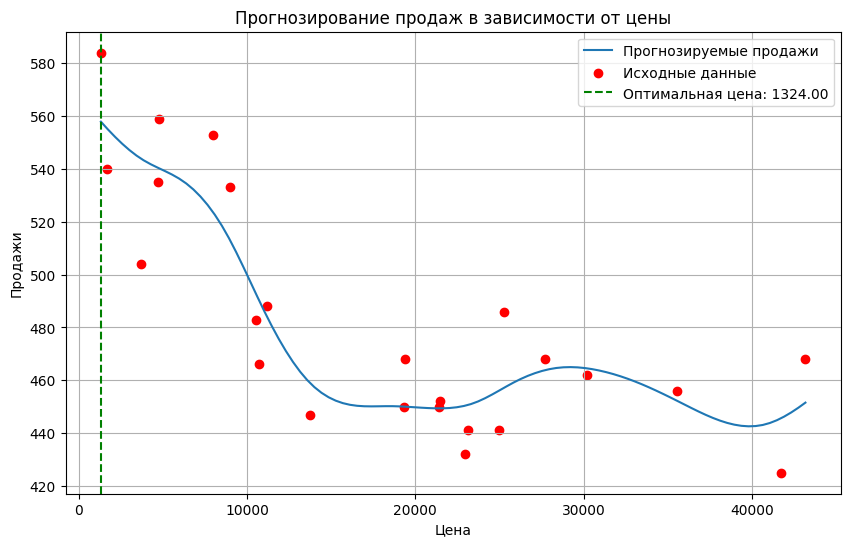

(1324.0, 557.8988835091549)

In [2]:
import numpy as np
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Данные
prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])
# Обучение модели
gam = LinearGAM(s(0)).fit(prices, sales)

# Прогнозирование на следующем месяце для различных цен
price_range = np.linspace(min(prices), max(prices), 100)
sales_pred = gam.predict(price_range)

# Поиск цены, при которой продажи максимальны
optimal_price = price_range[np.argmax(sales_pred)]
optimal_sales = max(sales_pred)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(price_range, sales_pred, label='Прогнозируемые продажи')
plt.scatter(prices, sales, color='red', label='Исходные данные')
plt.axvline(optimal_price, color='green', linestyle='--', label=f'Оптимальная цена: {optimal_price:.2f}')
plt.xlabel('Цена')
plt.ylabel('Продажи')
plt.title('Прогнозирование продаж в зависимости от цены')
plt.legend()
plt.grid(True)
plt.show()

# Вывод оптимальной цены и объема продаж
optimal_price, optimal_sales


In [19]:
file_path_1 = '/content/res_Kod_TT_2.xlsx'


# Чтение данных из Excel файла
# Если файл содержит несколько листов, вы можете указать название или индекс листа с помощью параметра sheet_name
df_80k = pd.read_excel(file_path_1, engine='openpyxl')

In [21]:
df_80k


,Kod_TT,SALES VOL
0,300B,51.360
1,300C,187.615
2,300K,45.030
3,300M,66.140
4,300Q,91.020
...,...,...
86293,Y994,40.040
86294,Y995,70.930
86295,Y996,29.050
86296,Y997,151.520


In [102]:
df_23k=df_80k[(df_80k["SALES VOL"]>=100) & (df_80k["SALES VOL"]<=101) ]

print(df_23k.shape)
df_4k_kod_TT =df_23k['Kod_TT'].unique()
print(df_4k_kod_TT.shape)


(634, 2)
(580,)


In [43]:
df_23k.describe()

,SALES VOL
count,634.000000
mean,100.492596
std,0.282181
min,100.000000
25%,100.260000
50%,100.490000
75%,100.730000
max,101.000000


In [103]:
df_23k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 8 to 86161
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kod_TT     634 non-null    object 
 1   SALES VOL  634 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.9+ KB


In [44]:
df_4k_kod_TT

array(['301B', '304U', '30GC', '30K7', '30TF', '3388', '33F8', '33H6',
       '33R6', '346O', '35BE', '35EI', '35IL', '35K1', '35ZR', '3613',
       '367T', '36AA', '375D', '37EN', '37HA', '37X8', '385D', '386Q',
       '38PD', '4211', '4537', '4798', '4870', '4875', '5921', '6864',
       '7346', '7643', '7880', '7901', '8248', '8436', '9492', '9624',
       '9659', 'D188', 'E185', 'E571', 'G275', 'G290', 'H838', 'J926',
       'J941', 'L605', 'L764', 'L951', 'O688', 'Q162', 'Q401', 'Q805',
       'Q876', 'S220', 'S248', 'S294', 'Y598', 'Y698', 'Y841', '309V',
       '30CF', '314B', '31CG', '31IL', '31TG', '33N4', '33O9', '33XC',
       '340F', '349Y', '34FV', '35G1', '369Q', '371Y', '380Y', '4087',
       '4330', '4343', '4358', '4618', '4718', '4988', '5208', '5288',
       '5292', '5328', '6846', '7910', '8293', '9055', '9617', 'D450',
       'D486', 'E342', 'G204', 'H047', 'J572', 'J770', 'O167', 'O259',
       'O286', 'O455', 'Q348', 'Q925', 'S087', 'S504', 'S599', 'X227',
      

In [114]:
# Данные
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d

# prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
# sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])

# # Исходные данные
# prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
# sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

# # Создаем интерполяционные функции
# f_prices = interp1d(np.linspace(0, 1, len(prices)), prices, kind='cubic')
# f_sales = interp1d(np.linspace(0, 1, len(sales)), sales, kind='cubic')

# # Генерируем 1000 значений
# x_new = np.linspace(0, 1, 1000)
# prices_new = f_prices(x_new)
# sales_new = f_sales(x_new)

# X = pd.DataFrame({'Price':prices})
# y = pd.DataFrame({'Sales':sales})

# ________________________________
# Создаем значения X, которые распределены по нормальному закону
# prices = np.random.normal(50, 10, 100)

# # Генерация зависимой переменной y как логарифмическая функция от X с добавлением шума
# sales = np.log(prices) * 1000 + np.random.normal(0, 50, 100)

# Создаем DataFrame
X = pd.DataFrame({'Price': prices})
y = pd.DataFrame({'Sales': sales})

# # Построение графика
# plt.figure(figsize=(10, 6))
# plt.scatter(X['Price'], y['Sales'], alpha=0.5)
# plt.xlabel('Price')
# plt.ylabel('Sales')
# plt.title('Данные, распределенные по логарифмической функции')
# plt.grid(True)
# plt.show()
# print(X.shape)
#______________________________
# Генерация данных
# np.random.seed(42)
# prices = np.random.normal(50, 10, 50)

# # Инвертированная зависимость: чем выше цена, тем ниже продажи, с ещё большей дисперсией
# sales = (10000 / prices) ** 2 + np.random.normal(0, 10000, 50)  # Увеличил разброс шума

# # Создание DataFrame
# X = pd.DataFrame({'Price': prices})
# y = pd.DataFrame({'Sales': sales})

# # Построение графика
# plt.figure(figsize=(10, 6))
# plt.scatter(X['Price'], y['Sales'], alpha=0.5, color='blue')
# plt.xlabel('Price')
# plt.ylabel('Sales')
# plt.title('Данные с убывающей зависимостью продаж от цены и увеличенной дисперсией')
# plt.grid(True)
# plt.show()
#_______________
# Путь к вашему Excel файлу
file_path = '/content/ALL_res_Sales_vol_price_Kod_TT.xlsx'


# Чтение данных из Excel файла
# Если файл содержит несколько листов, вы можете указать название или индекс листа с помощью параметра sheet_name
df_kod_TT = pd.read_excel(file_path, engine='openpyxl')
# df_kod_TT = df_kod_TT[df_kod_TT['PRICE PER UNIT'] >= 400]
# items = [
#     "7224",
#     "5207",
#     "5257",
#     "D084",
#     "3874",
#     "5184",
#     "J502",
#     "5216",
#     "6910",
#     "5194"
# ]
# df_kod_TT = df_kod_TT[(df_kod_TT['Kod_TT'] == '7224') | (df_kod_TT['Kod_TT'] == '5207')]
# print(df_kod_TT)
# 'S848','S849'
# 314B
# 31CW
my_list = ['30CP', '30WL', '312M', '314B', '31CW', '31KC', '33IC', '3460', '346O', '35BE']
df_kod_TT = df_kod_TT[df_kod_TT['Kod_TT'].isin(my_list)]
df_kod_TT = df_kod_TT[df_kod_TT['PRICE PER UNIT'] >= 400]



X = pd.DataFrame({'Price': df_kod_TT['PRICE PER UNIT'].tolist()})
y = pd.DataFrame({'Sales': df_kod_TT['SALES VOL'].tolist()})

# X = X[X['Price'] >= 400]
# y = y[y['Sales'] >= 15]



In [115]:
df_kod_TT

,Unnamed: 0,SALES VOL,PRICE PER UNIT,Kod_TT
3,3,4.4,585.622727,30CP
25,25,4.0,573.962500,30WL
34,34,4.4,617.834091,312M
35,35,6.4,472.871875,314B
41,41,2.0,603.410000,31CW
...,...,...,...,...
21054,21054,1.2,574.541667,31KC
21157,21157,1.2,574.500000,33IC
21247,21247,3.6,531.355556,3460
21252,21252,4.4,543.331818,346O


In [116]:
df_kod_TT.describe()

,Unnamed: 0,SALES VOL,PRICE PER UNIT
count,120.000000,120.000000,120.000000
mean,8506.033333,4.956667,531.987544
std,6877.461558,2.953668,47.465799
min,3.000000,0.400000,429.500833
25%,2097.250000,2.800000,490.129582
50%,7631.000000,4.400000,543.359091
75%,13501.250000,6.400000,565.311979
max,21374.000000,17.200000,633.687500


In [117]:
quantiles = [0.25,0.5,0.975]
gam_res = {}
for q in quantiles:
  gam  = ExpectileGAM(s(0),expectile=q)
  gam.fit(X,y)
  gam_res[q]=gam
gam_res


{0.25: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.25, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

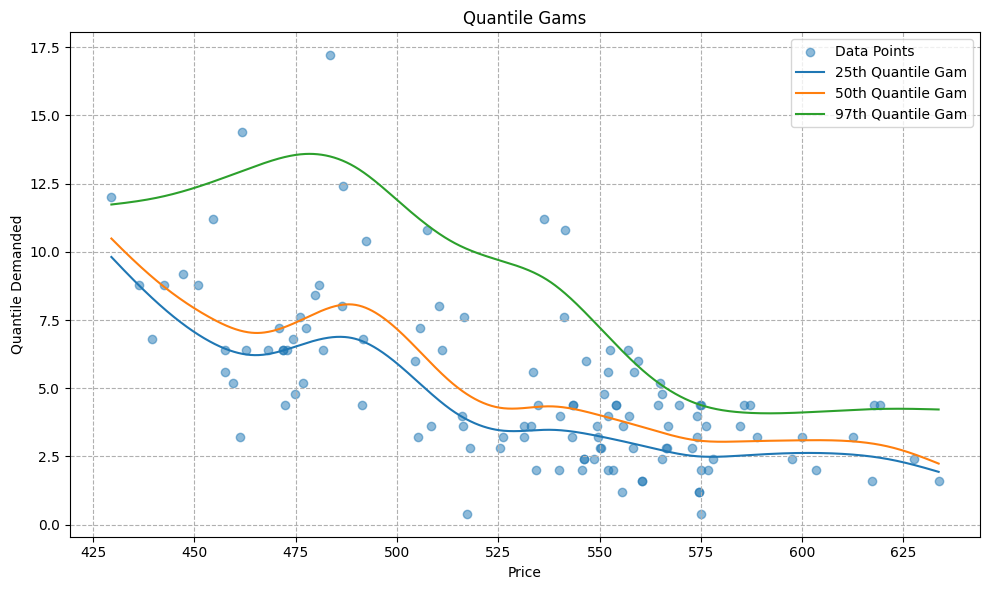

In [118]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.5,label='Data Points')
XX = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
for q,gam in gam_res.items():
   plt.plot(XX,gam.predict(XX),label=f'{int(q*100)}th Quantile Gam')

plt.xlabel('Price')
plt.ylabel('Quantile Demanded')
plt.title('Quantile Gams')
plt.grid(True,which='both',linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
gam_res

{0.25: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.25, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     26.10
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           4.05e-05
Time:                        14:40:25   Log-Likelihood:                -115.33
No. Observations:                  24   AIC:                             234.7
Df Residuals:                      22   BIC:                             237.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        532.2268     11.521     46.195      0.0

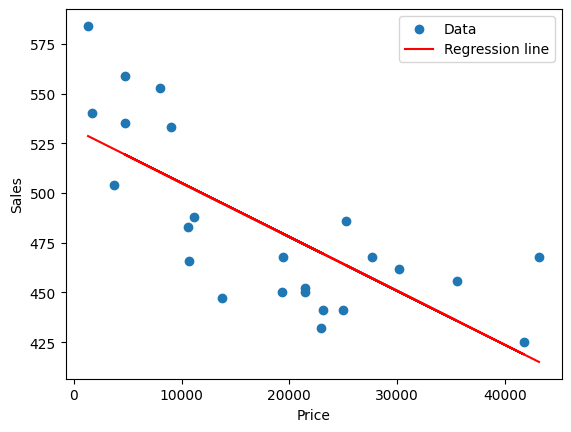

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Исходные данные
prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])
# Создаем DataFrame
X = pd.DataFrame({'Price': prices})
y = pd.DataFrame({'Sales': sales})

# Добавляем константу для свободного члена
X = sm.add_constant(X)

# Создаем модель линейной регрессии
model = sm.OLS(y, X)

# Обучаем модель
results = model.fit()

# Выводим результаты
print(results.summary())

# Предсказываем значения
y_pred = results.predict(X)

# Строим график
plt.scatter(X['Price'], y, label='Data')
plt.plot(X['Price'], y_pred, color='red', label='Regression line')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [8]:
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d
import plotly.express as px
import pytimetk as tk
import textwrap
import numpy as np


# Исходные данные
prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])
# Создаем DataFrame
data = pd.DataFrame({'Price': prices, 'Sales': sales})

# Создаем scatter plot с линией LOWESS
fig = px.scatter(data, x='Price', y='Sales', trendline='lowess')

# Показываем график
fig.show()

In [9]:
all_gam_results = pd.DataFrame()
quantiles

[0.25, 0.5, 0.975]

In [10]:
# Путь к вашему Excel файлу
file_path = '/content/ALL_res_Sales_vol_price_Kod_TT.xlsx'

# Чтение данных из Excel файла
# Если файл содержит несколько листов, вы можете указать название или индекс листа с помощью параметра sheet_name
df_kod_TT = pd.read_excel(file_path, engine='openpyxl')

